# P10 D√©tectez des faux billets avec Python 

In [1]:
#Importation des librairies

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

from sklearn.linear_model import LinearRegression


# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import de la fonction d'√©valuation de l'algorithme  
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set()

import warnings
warnings.simplefilter("ignore")
from functions_OC_fr import *

# pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#Importation des donn√©es
billets= pd.read_csv(r'C:\Users\franc\Desktop\DATA\PROJET 10 D√©tectez des faux billets avec R ou Python\Donn√©es\donnees_billets.csv',delimiter=";")
df=billets.copy()

#Aper√ßu des donn√©es 
df.head()


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

# Analyse exploratoire des donn√©es

In [3]:
#Structure du jeu de donn√©es
df.shape

(1500, 7)

In [4]:
#Types des variables
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [5]:
#Apper√ßu des donn√©es
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
#Affichage du nombre de vrais et faux billets 
df["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [7]:
#Affichage des billets vrais
genuine= df.loc[df['is_genuine']==True]
genuine.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [8]:
#Affichage des principales caract√©ristiques des vrais billets 
genuine.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  1000.000000  1000.000000    1000.00000  971.000000  1000.00000   
mean    171.987080   103.949130     103.80865    4.116097     3.05213   
std       0.300441     0.300231       0.29157    0.319124     0.18634   
min     171.040000   103.140000     102.82000    2.980000     2.27000   
25%     171.790000   103.740000     103.61000    3.905000     2.93000   
50%     171.990000   103.950000     103.81000    4.110000     3.05000   
75%     172.200000   104.140000     104.00000    4.340000     3.18000   
max     172.920000   104.860000     104.95000    5.040000     3.74000   

            length  
count  1000.000000  
mean    113.202430  
std       0.359552  
min     111.760000  
25%     112.950000  
50%     113.205000  
75%     113.460000  
max     114.440000

In [9]:
#Affichage des faux billets
not_genuine= df.loc[df['is_genuine']==False]
not_genuine.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1000       False    172.28       103.95        103.91        4.78       3.31   
1001       False    171.92       103.86        104.30        4.96       3.13   
1002       False    171.59       104.14        104.38        4.97       3.47   
1003       False    172.02       104.33        104.33        5.19       3.21   
1004       False    172.55       104.25        104.23        5.60       3.13   

      length  
1000  111.40  
1001  111.29  
1002  111.22  
1003  111.99  
1004  111.72

In [10]:
#Affichage des principales caract√©ristiques des faux billets
not_genuine.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  500.000000   500.000000    500.000000  492.000000  500.000000   
mean   171.901160   104.190340    104.143620    5.215935    3.350160   
std      0.306861     0.223758      0.270878    0.553531    0.180498   
min    171.040000   103.510000    103.430000    3.820000    2.920000   
25%    171.690000   104.040000    103.950000    4.840000    3.220000   
50%    171.910000   104.180000    104.160000    5.190000    3.350000   
75%    172.092500   104.332500    104.320000    5.592500    3.472500   
max    173.010000   104.880000    104.950000    6.900000    3.910000   

           length  
count  500.000000  
mean   111.630640  
std      0.615543  
min    109.490000  
25%    111.200000  
50%    111.630000  
75%    112.030000  
max    113.850000

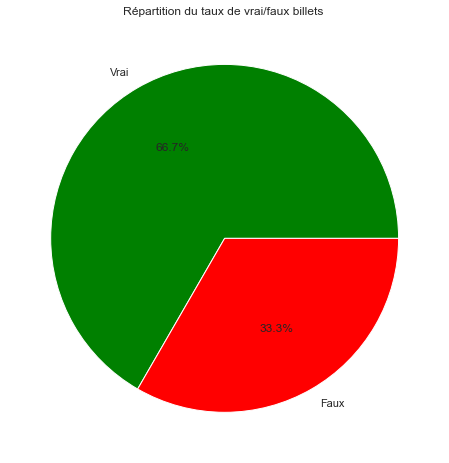

In [11]:
#Affichage du taux de r√©partition de Vrais/Faux billets

fig = plt.figure(figsize=(8, 8))

labels=['Vrai','Faux']
colors=['green', 'red']

plt.pie(df['is_genuine'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('R√©partition du taux de vrai/faux billets ')
plt.show()

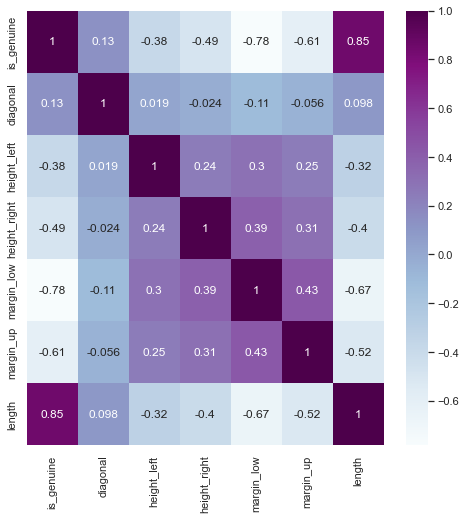

In [12]:
# On affiche la matrice de corr√©lation de notre df

plt.figure(figsize=(8, 8))

sns.heatmap(df.corr(), annot=True, cmap="BuPu")
plt.show()

La variable margin_low est corr√©l√©e n√©gativement √† la variable length et is_genuine


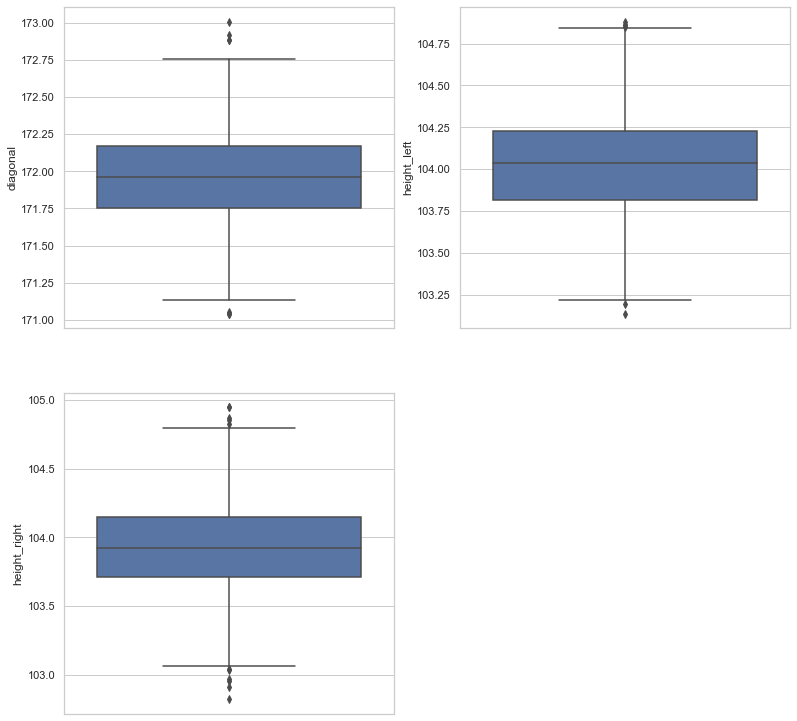

In [13]:
# Visualisation graphique en boxplot de la dispersion des valeurs pour toutes les variables
plt.figure(figsize=(13, 13))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df,  y='diagonal')
plt.subplot(222)
sns.boxplot(data=df,  y='height_left')
plt.subplot(223)
sns.boxplot(data=df,  y='height_right');

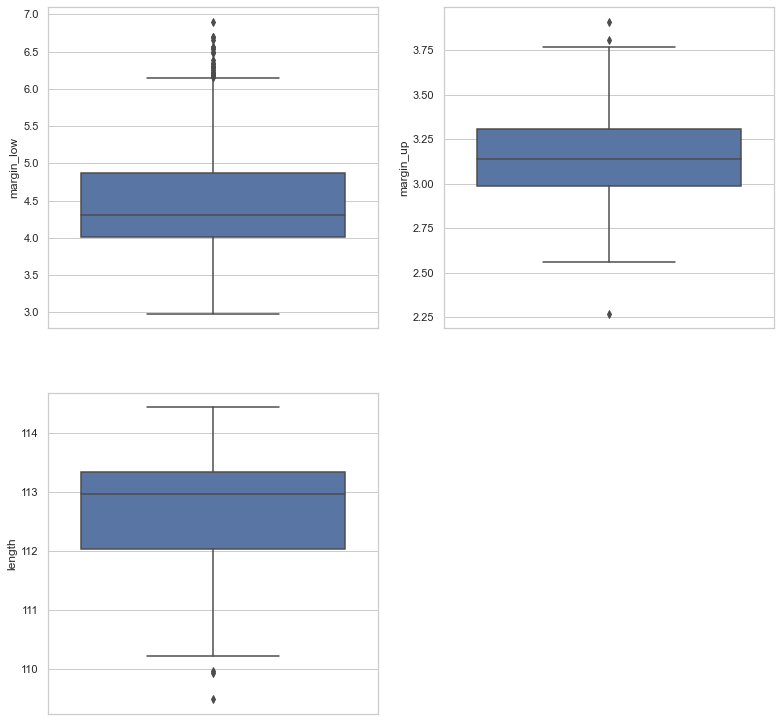

In [14]:
# Visualisation graphique en boxplot de la dispersion des valeurs pour toutes les variables
plt.figure(figsize=(13, 13))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df,  y='margin_low')
plt.subplot(222)
sns.boxplot(data=df,  y='margin_up')
plt.subplot(223)
sns.boxplot(data=df,  y='length');

<Figure size 576x576 with 0 Axes>

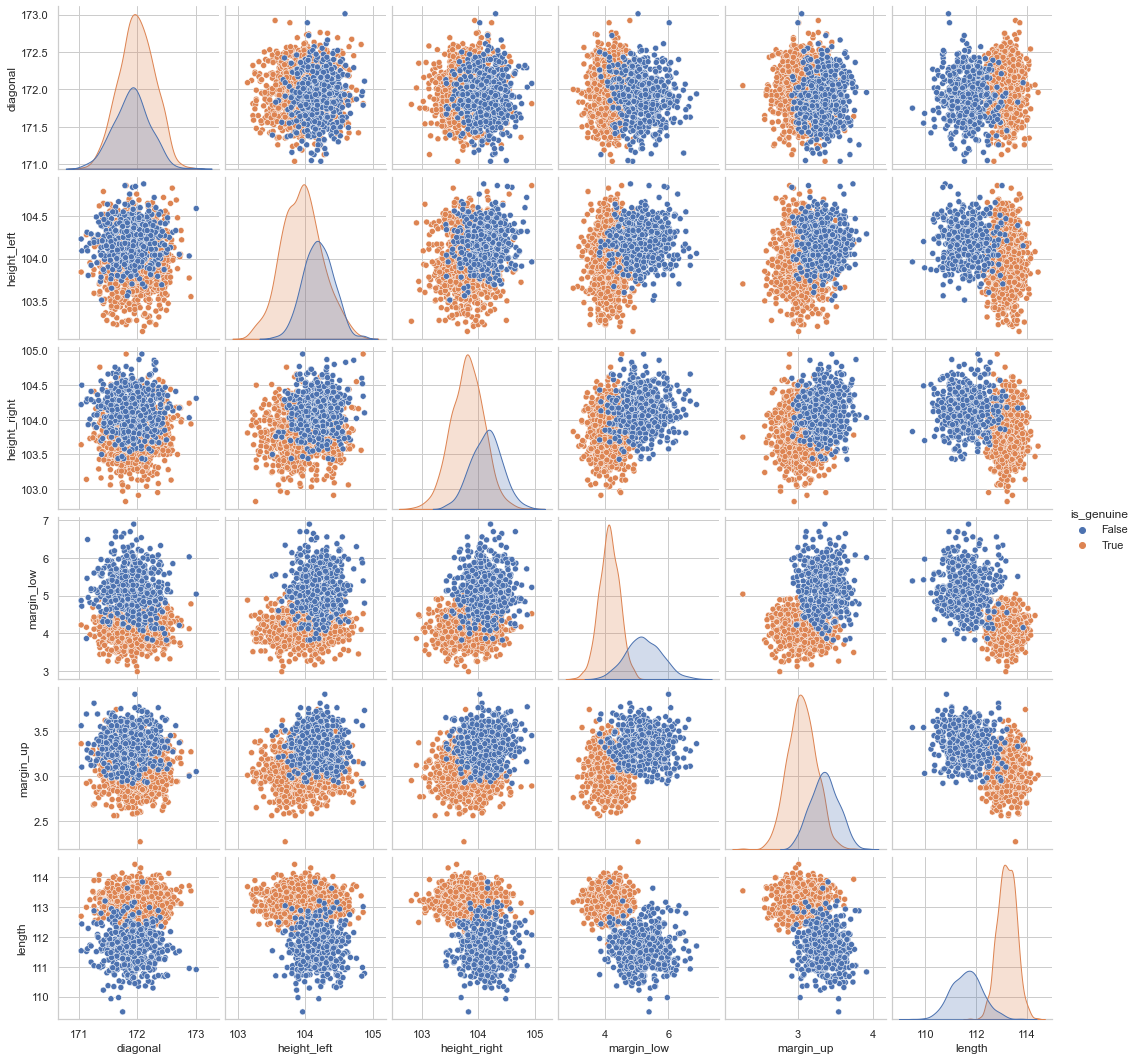

In [15]:
#Affichage de la matrice de diagrammes de dispersion

fig = plt.figure(figsize=(8, 8))

sns.pairplot(df, hue='is_genuine')
plt.show();

In [16]:
#Afficher toute les colonnes qui ont des floats
for col in df.select_dtypes("float"):
    print(col)

diagonal
height_left
height_right
margin_low
margin_up
length


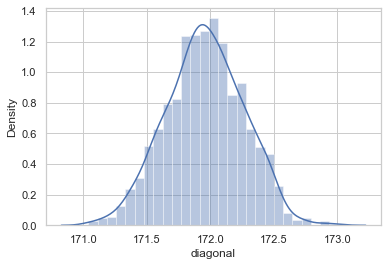

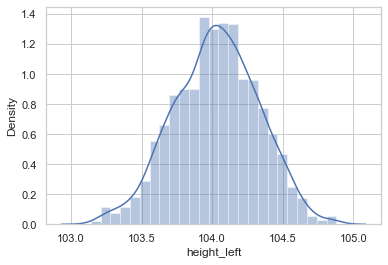

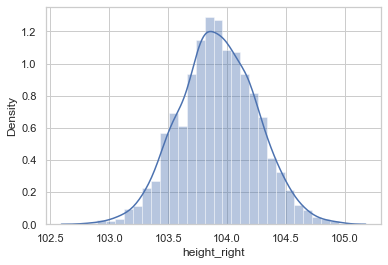

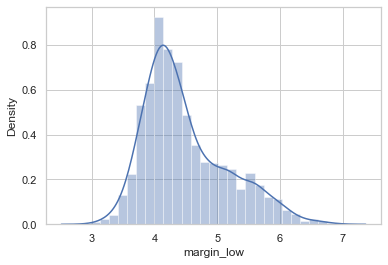

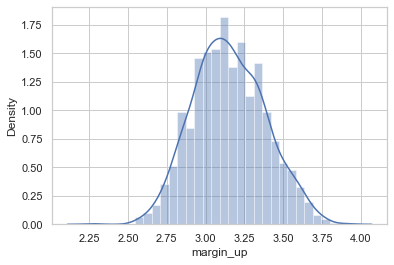

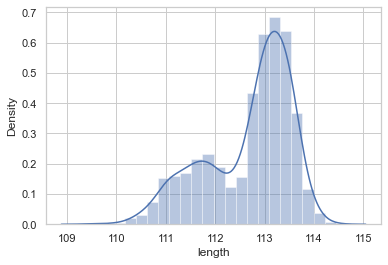

In [17]:
#Afficher la distribution des diff√©rentes variables
for col in df.select_dtypes("float"):
    plt.figure()
    sns.distplot(df[col])

La plupart de nos variables ont l'air de suivre une distribution normale

In [18]:
#Pour pouvoir utiliser toutes les donn√©es lors de nos analyses, on convertit la colonne is_genuine BOOL en INT 

df['is_genuine']=df['is_genuine'].astype(int)

In [19]:
df.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

- Le billet est vrai si is_genuine = 1
- Le billet est faux si is_genuine = 0

## Les valeurs manquantes 

In [20]:
#Recherche de valeurs manquantes
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

La variable margin_low a 37 valeurs manquantes

In [21]:
#Affichage du pourcentage de valeurs manquantes
print('% de valeurs manquantes')
display(((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False))

#Recherche de valeurs en double 
print('valeurs en double')
display(df.duplicated().sum())

#Structure du df
display(df.shape)

% de valeurs manquantes


margin_low      2.466667
is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_up       0.000000
length          0.000000
dtype: float64

valeurs en double


0

(1500, 7)

Les donn√©es manquantes pour margin_low sont n√©gligeables ~2.47% mais nous allons suivre le conseil du coll√®gue et effectuer une imputation des valeurs manquantes par r√©gression lin√©aire

# Traitement des valeurs manquantes par r√©gression lin√©aire multiple

## S√©paration des donn√©es en deux dataframes

- Cr√©ation df_manquants : df des valeurs manquantes o√π on retire la colonne margin_low avec lequel nous effectuerons la r√©gression lin√©aire multiple 

- Cr√©ation df_sans_manquants : df sans les valeurs manquantes avec lequel nous compl√®terons les donn√©es manquantes pour reconstituer notre jeu de donn√©es


In [22]:
#Cr√©ation df des valeurs manquantes o√π on retire la colonne margin_low 
df_manquants= df[df["margin_low"].isnull()] 
df_manquants= df_manquants.drop("margin_low", axis=1)  #variables √† imputer
df_manquants.head()

is_genuine  diagonal  height_left  height_right  margin_up  length
72            1    171.94       103.89        103.45       3.25  112.79
99            1    171.93       104.07        104.18       3.14  113.08
151           1    172.07       103.80        104.38       3.02  112.93
197           1    171.45       103.66        103.80       3.62  113.27
241           1    171.83       104.14        104.06       3.02  112.36

In [23]:
#Structure de df_manquants
df_manquants.shape

(37, 6)

In [24]:
# df sans valeurs manquantes qu'on utilisera pour notre analyse
df_sans_manquants = df.dropna()
df_sans_manquants.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

### Standardisation des variables sans donn√©es manquantes

is_genuine est la variable r√©sultante de toutes les autres varaibles pour d√©finir si le billet est vrai ou faux. Donc on la retire de la regression lin√©aire pour √©viter une fuite de donn√©es

En effet, si jamais dans le jeu de test final nous avions des donn√©es manquantes alors que le but du projet est de pr√©dire is_genuine (billet Vrai/Faux), il y aurait fuite de donn√©es et donc incoh√©rence dans le mod√®le.

Pour √©viter cela, nous devons suivre les best practices et retirer is_genuine du mod√®le.

In [25]:
# S√©lection des colonnes √† utiliser pour la r√©gression et on retire is_genuine 
colonnes = ["diagonal", "height_left", "height_right", "margin_up", "length","margin_low"]


In [26]:
#Standardisation des donn√©es
scaler = StandardScaler()
df_sans_manquants_std = scaler.fit_transform(df_sans_manquants[colonnes])

# Regression lin√©aire


In [27]:
#Affichage des donn√©es standardis√©es 
df_sans_manquants_std

array([[-0.48859357,  2.76680735,  3.17376615, -1.13698239,  0.17784229,
         0.05128623],
       [-1.63480853, -2.24148961, -0.80685073, -0.7048056 ,  0.47569209,
        -1.07893701],
       [ 2.39331832,  1.49803879, -1.30057066, -0.92089399,  0.55588243,
        -0.12954949],
       ...,
       [-0.52134257, -0.07122759,  0.61259405,  0.89424851, -0.83026476,
         1.5431809 ],
       [ 0.3301314 ,  0.83026586,  0.42744908,  1.32642529, -0.4865919 ,
         1.03081304],
       [-1.60205953,  0.39621346, -0.31313081,  0.93746618, -0.69279562,
         0.2170523 ]])

In [28]:
colonnes

['diagonal',
 'height_left',
 'height_right',
 'margin_up',
 'length',
 'margin_low']

In [29]:
# Mod√©lisation de la regression lin√©aire
mod1 = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=pd.DataFrame(df_sans_manquants_std, columns=colonnes)).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          2.60e-202
Time:                        14:41:40   Log-Likelihood:                -1601.3
No. Observations:                1463   AIC:                             3215.
Df Residuals:                    1457   BIC:                             3246.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.658e-15      0.019   -1.4e-13   

- Toutes les variables sont significatives car toutes les variables ont une P-Value inf√©rieure √† 0.05
 
- Le mod√®le de regression lin√©aire a une pr√©cision assez moyenne avec un R¬≤ = 47.70% et un R¬≤ ajust√©= 47.60%
- Malgr√© tout, √©tant donn√© qu'on va suivre le conseil du coll√®gue et r√©aliser notre imputation des valeurs manquantes par r√©gression lin√©aire, nous d√©cidons tout de m√™me d'utiliser ce mod√®le.


### Retrait des outliers

Recherche d'outliers pour toutes les variables significatives

In [30]:
#Calcul de IQR (interquartile)
bornes = {}
for colonne in df.columns:
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    bornes[colonne] = (borne_inf, borne_sup)

In [31]:
# On exclu les outliers de chaque colonne
df_sans_outliers = df.copy()
for colonne in df.columns:
    borne_inf, borne_sup = bornes[colonne]
    df_sans_outliers = df_sans_outliers[(df_sans_outliers[colonne] >= borne_inf) & (df_sans_outliers[colonne] <= borne_sup)]

# Cr√©ation du mod√®le de r√©gression lin√©aire 

In [32]:
#Mod√®le de r√©gression lin√©aire retenu
X = df_sans_outliers.drop("margin_low", axis=1)

X_train_reg_lin =  sm.add_constant(X)
y = df_sans_outliers['margin_low']

model_reg_multi = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=pd.DataFrame(df_sans_outliers, columns=colonnes)).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          2.60e-202
Time:                        14:41:40   Log-Likelihood:                -1601.3
No. Observations:                1463   AIC:                             3215.
Df Residuals:                    1457   BIC:                             3246.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.658e-15      0.019   -1.4e-13   

# Analyse des r√©sultats : V√©rification des hypoth√®ses pour utiliser le mod√®le de r√©gression lin√©aire

- On v√©rifie d'abord l'influence des valeurs atypiques

L'utilisation de la R√©gression Lin√©aire suppose la v√©rification de plusieurs hypoth√®ses:
- Normalit√© : Les r√©sidus doivent suivre une distribution normale.
- Ind√©pendance : Les r√©sidus doivent √™tre ind√©pendants les uns des autres.
- Lin√©arit√© : La relation entre la variable d√©pendante et les variables ind√©pendantes doit √™tre lin√©aire.
- Homosc√©dasticit√© : La variance des r√©sidus doit √™tre constante pour toutes les valeurs des variables ind√©pendantes.


## V√©rification de l'influence des valeurs atypiques

- On doit v√©rifier si nos observations ont potentiellement une influence disproportionn√©e 
- Nous allons ici r√©aliser les tests √† un niveau ùõº=5% :

In [33]:
#R√©cup√©rons le nombre d'individus de l'√©chantillon, et le nombre de variables.
alpha=0.05
n = df_sans_outliers.shape[0]
p = 6

### Calcul des leviers

On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de  $2‚àó\frac{p}{n}$.

In [34]:
#Cr√©ation d'un df analyses
analyses = pd.DataFrame({'obs':np.arange(1,n+1)},
                        index=df_sans_outliers.index.tolist())


In [35]:
#Cr√©ation des leviers
analyses['levier'] = model_reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

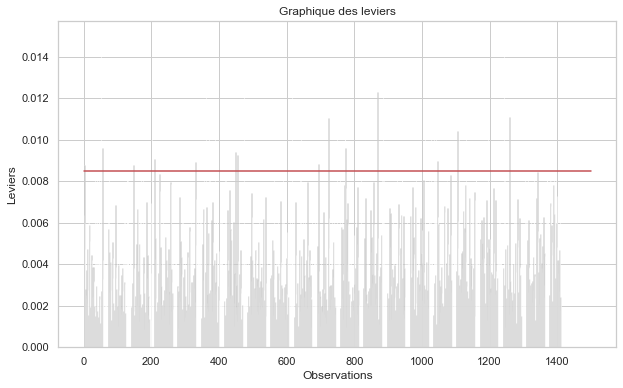

In [36]:
# Graphique des leviers
plt.figure(figsize=(10, 6))
analyses = analyses.sort_values('obs', ascending=True) # trier les donn√©es par ordre croissant
plt.bar(analyses['obs'], analyses['levier'], color='black', alpha=0.5)
plt.xlabel('Observations')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.title('Graphique des leviers')
plt.show()

In [37]:
# Les points qui ont un levier sup√©rieur au seuil de levier
outliers_potentiels= analyses.loc[analyses['levier'] > seuil_levier, :]
outliers_potentiels= outliers_potentiels.sort_values('levier',ascending= False)
display(outliers_potentiels.head(5))
display(outliers_potentiels.shape)

obs    levier
1310  1243  0.014975
52      52  0.014687
921    884  0.013448
375    362  0.013010
636    616  0.012729

(59, 2)

Graphique repr√©sentant l'ensemble des leviers pour tous les points. Les observations ne sont pas disproportionn√©es. Une observation √† 0.01 mais cela est tr√®s n√©gligeable

- On a 59 observations qui ont potentiellement une influence disproportionn√©e

### Calcul des r√©sidus studentis√©s

Les r√©sidus studentis√©s sont une mesure de la diff√©rence entre les valeurs observ√©es et les valeurs pr√©dites par le mod√®le de r√©gression. Les observations avec des r√©sidus studentis√©s √©lev√©s ont une influence disproportionn√©e sur les r√©sultats de la r√©gression lin√©aire et peuvent fausser les pr√©visions.

On calcule les r√©sidus studentis√©s, sachant que le seuil pour les r√©sidus studentis√©s est une loi de Student √† n-p-1 degr√©s de libert√© :

In [38]:
# On calcule les r√©sidus studentis√©s, sachant que le seuil pour les r√©sidus studentis√©s est une loi de Student √† n-p-1 degr√©s de libert√© :
analyses['rstudent'] = model_reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

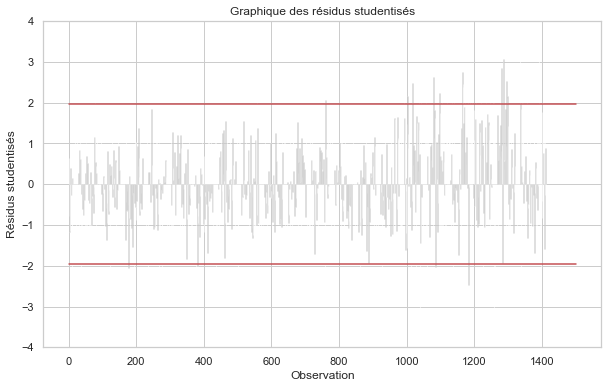

In [39]:
#Le graphique des r√©sidus studentis√©s

plt.figure(figsize=(10, 6))
plt.bar(analyses['obs'], analyses['rstudent'], color='black', alpha=0.5)
plt.xlabel('Observation')
plt.ylabel('R√©sidus studentis√©s')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.ylim(-4, 4)  # Ajuster la limite de l'axe des ordonn√©es pour mieux visualiser les observations
plt.title('Graphique des r√©sidus studentis√©s')
plt.show()

- Le graphique des r√©sidus studentis√©s permet d'identifier les observations qui ont une influence disproportionn√©e sur les r√©sultats d'une r√©gression lin√©aire.
- En g√©n√©ral, un r√©sidu studentis√© est consid√©r√© comme √©lev√© s'il est sup√©rieur √† 2 ou 3 en valeur absolue. 
- On peut donc consid√©rer que les observations n'ont pas une influence disproportionn√©e sur les r√©sultats de la r√©gression lin√©aire.

### D√©termination de la distance de Cook
Permet √©galement de d√©tecter les observations influentes 

In [40]:
influence = model_reg_multi.get_influence().summary_frame()

In [41]:
#Le seuil de la distance de Cook est de n-p.

analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

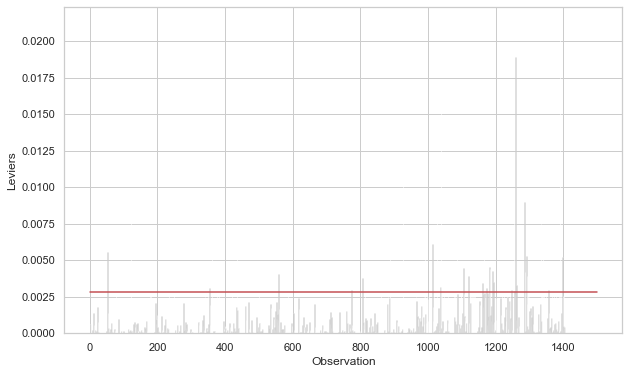

In [42]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'], color='black', alpha=0.5)
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

Malgr√© le fait qu'on ait d√©tect√© plusieurs valeurs qui pourraient √™tre atypiques et influentes, il faut v√©rifier qu'elles soient v√©ritablement aberrantes pour les retirer.

## V√©rification de la distribution normale des r√©sidus

### L'histogramme des erreurs absolues 

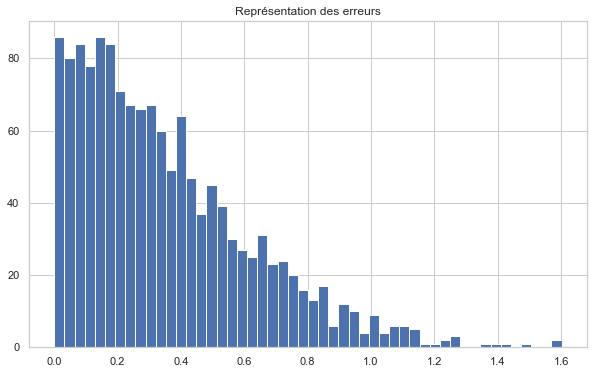

In [43]:
# Repr√©sentation des erreurs avec un histogramme
plt.figure(figsize=(10,6))

y_pred = model_reg_multi.predict(X)
erreur_hist = np.abs( y - y_pred)
plt.hist(erreur_hist,bins=50)
plt.title("Repr√©sentation des erreurs")
plt.show()

L'histogramme des erreurs absolues permet de voir la r√©partition des erreurs absolues et de d√©tecter des valeurs aberrantes.
Dans ce cas, l'histogramme semble suivre une distribution normale.

### Histogramme des r√©sidus

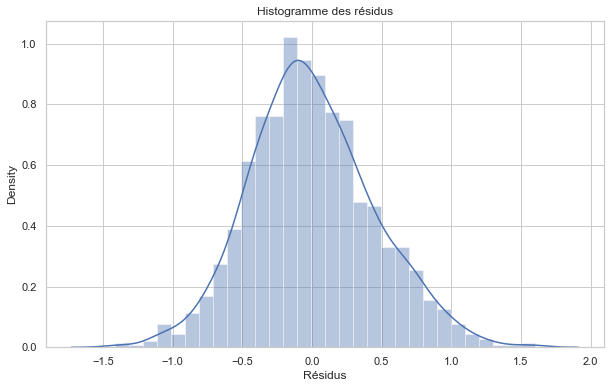

In [44]:
# Affichage de l'histogramme des r√©sidus
plt.figure(figsize=(10,6))

sns.distplot(model_reg_multi.resid)
plt.xlabel('R√©sidus')
plt.title('Histogramme des r√©sidus')
plt.show()

L'histogramme des r√©sidus repr√©sente la distribution des r√©sidus. 
- Dans ce cas,La distribution des r√©sidus est centr√©e autour de 0 et √† peu pr√®s sym√©trique. Cela indique que le mod√®le de r√©gression lin√©aire est appropri√© pour les donn√©es. 
- l'histogramme semble suivre une distribution normale.


### Test de la normalit√© des r√©sidus de Shapiro-Wilk

In [45]:
# Test de Shapiro-Wilk
shapiro(model_reg_multi.resid)

ShapiroResult(statistic=0.994949996471405, pvalue=0.00010943715460598469)

- Avec Shapiro, la normalit√© n'est pas v√©rifi√©e car la P-value n'est pas sup√©rieure √† 0.05. 
Le test de Shapiro est sensible √† la taille de l'√©chantillon. 
- Il est judicieux d'effectuer un autre test car comme on peut le voir dans l'histogramme des r√©sidus et l'histogramme des erreurs absolues, nous pouvons tout de m√™me sugg√©rer une distribution normale.

### Le graphique quantile-quantile (QQ plot)

Le graphique QQ plot compare les quantiles des r√©sidus avec les quantiles d'une distribution normale. Si les points sont align√©s sur une ligne droite, cela sugg√®re que les r√©sidus suivent une distribution normale. Si les points s'√©cartent de la ligne droite, cela sugg√®re une violation de la normalit√©.

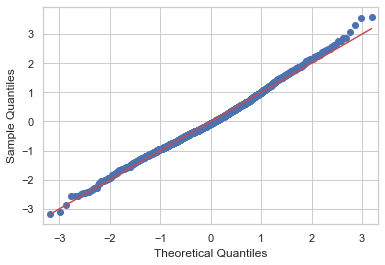

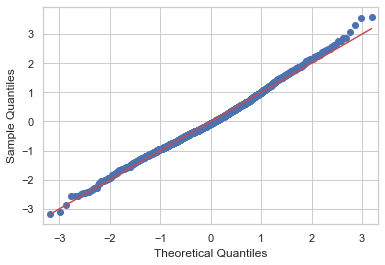

In [46]:
#Graphique du QQ plot
import statsmodels.graphics.gofplots as smg

residus = model_reg_multi.resid
smg.qqplot(residus, line='s', fit=True)

Le graphique QQ plot sugg√®re une distribution normale des r√©sidus car les points semblent align√©s sur la droite. 

## Ind√©pendance des r√©sidus 


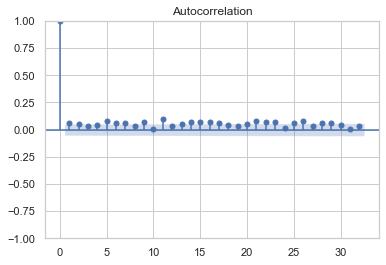

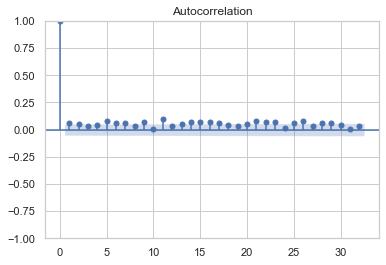

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
#Calcul des r√©sidus du mod√®le 

residus = model_reg_multi.resid

plot_acf(residus)


Le premier b√¢tonnet est tr√®s √©lev√©, c'est l'auto-corr√©lation des r√©sidus avec eux-m√™me. Les b√¢tonnets 2 √† n ne d√©passent pas la zone bleue. Cela indique l'ind√©pendance des r√©sidus

## V√©rification de la lin√©arit√©

La relation entre les variables ind√©pendantes et la variable d√©pendante doit √™tre lin√©aire.

### Test de Durbin-Watson

In [48]:
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
print("Le r√©sultat renvoie", round(durbin_watson(model_reg_multi.resid),3),"et donc pas d'autocorr√©lation car valeur proche de 2")

Le r√©sultat renvoie 1.879 et donc pas d'autocorr√©lation car valeur proche de 2


Le Test de Durbin-Watson v√©rifie √† la fois l'ind√©pendance des r√©sidus et la lin√©arit√© entre les variables ind√©pendantes et la variable d√©pendante.

## V√©rification de la colin√©arit√© des variables

La colin√©arit√© est un probl√®me courant en r√©gression lin√©aire qui se produit lorsque deux ou plusieurs variables ind√©pendantes sont fortement corr√©l√©es entre elles

In [49]:
#V√©rification de la colin√©arit√© des variables
variables = model_reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.013321445424569,
 1.1278264068564212,
 1.2258786450612054,
 1.4001967532105002,
 1.5811655198118686]

Les coefficients sont inf√©rieurs √† 10 donc il n'y a pas de probl√®me de colin√©arit√© entre les variables ind√©pendantes

## Homosc√©dasticit√©

On v√©rifie si la dispersion des r√©sidus est constante le long de la plage des valeurs pr√©dites.

Une dispersion constante indique une homosc√©dasticit√©, ce qui est souhaitable dans la r√©gression lin√©aire.

Si la dispersion des r√©sidus augmente ou diminue avec les valeurs pr√©dites, cela peut indiquer une violation de l'hypoth√®se d'homosc√©dasticit√©.

### Test de Breusch-Pagan

Le test de Breusch-Pagan est un test statistique qui permet de v√©rifier l'homog√©n√©it√© des r√©sidus. Il teste l'hypoth√®se nulle selon laquelle la variance des r√©sidus est constante. Si la valeur p du test est sup√©rieure √† un seuil pr√©d√©fini (par exemple, 0,05), cela sugg√®re une homosc√©dasticit√©.

In [50]:
#Test de Breusch Pagan
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(model_reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 1.1614158908147156e-14


Le r√©sultat est inf√©rieur √† 0.05 donc l'homosc√©dasticit√© des r√©sidus n'est pas v√©rifi√©e

Pour r√©sumer, toutes les hypoth√®ses sont v√©rifi√©es √† part l'homosc√©dasticit√© des r√©sidus qui peuvent remettre en question l'utilisation du mod√®le de r√©gression lin√©aire.

# Cr√©ation du df_final avec les donn√©es pr√©dites

On utilise le df_manquants qui ne repr√©sente que les donn√©es pour lesquelles nous avons des donn√©es manquantes pour margin_low sans la colonne margin_low que nous compl√®terons plus tard avec les donn√©es pr√©dites


In [51]:
#Affichage du df_manquants des donn√©es manquantes sans la coloone margin_low
df_manquants.head()

is_genuine  diagonal  height_left  height_right  margin_up  length
72            1    171.94       103.89        103.45       3.25  112.79
99            1    171.93       104.07        104.18       3.14  113.08
151           1    172.07       103.80        104.38       3.02  112.93
197           1    171.45       103.66        103.80       3.62  113.27
241           1    171.83       104.14        104.06       3.02  112.36

In [52]:
#Cr√©ation du dataframe de predictions
#On reprend le df_manquants avec les valeurs manquantes dans lequel on va enlever toutes les variables non significatives

predictions=df_manquants.drop('is_genuine',axis=1)

In [53]:
#On effectue la pr√©diction 
valeurs_predites=model_reg_multi.predict(predictions)

# Ajout d'une nouvelle colonne margin_low_predites avec les valeurs pr√©dites
df_manquants['margin_low_predites']=valeurs_predites

In [54]:
#La colonne margin_low_predites a bien √©t√© ajout√©e dans le df_manquants (avec seulement les donn√©es manquantes)
df_manquants.head()

is_genuine  diagonal  height_left  height_right  margin_up  length  \
72            1    171.94       103.89        103.45       3.25  112.79   
99            1    171.93       104.07        104.18       3.14  113.08   
151           1    172.07       103.80        104.38       3.02  112.93   
197           1    171.45       103.66        103.80       3.62  113.27   
241           1    171.83       104.14        104.06       3.02  112.36   

     margin_low_predites  
72              4.301381  
99              4.372654  
151             4.383456  
197             4.310763  
241             4.613224

In [55]:
#On copie le df original et on remplace margin_low par margin_low_predites 
df_final= df.copy()
df_final.loc[df_manquants.index, 'margin_low'] = df_manquants['margin_low_predites']
df_final.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

# Analyse exploratoire du data_final

In [56]:
#Affichage des caract√©ristiques 
df_final.describe()

is_genuine     diagonal  height_left  height_right   margin_low  \
count  1500.000000  1500.000000  1500.000000   1500.000000  1500.000000   
mean      0.666667   171.958440   104.029533    103.920307     4.482899   
std       0.471562     0.305195     0.299462      0.325627     0.659412   
min       0.000000   171.040000   103.140000    102.820000     2.980000   
25%       0.000000   171.750000   103.820000    103.710000     4.020000   
50%       1.000000   171.960000   104.040000    103.920000     4.310000   
75%       1.000000   172.170000   104.230000    104.150000     4.870000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up      length  
count  1500.000000  1500.00000  
mean      3.151473   112.67850  
std       0.231813     0.87273  
min       2.270000   109.49000  
25%       2.990000   112.03000  
50%       3.140000   112.96000  
75%       3.310000   113.34000  
max       3.910000   114.44000

<Figure size 576x576 with 0 Axes>

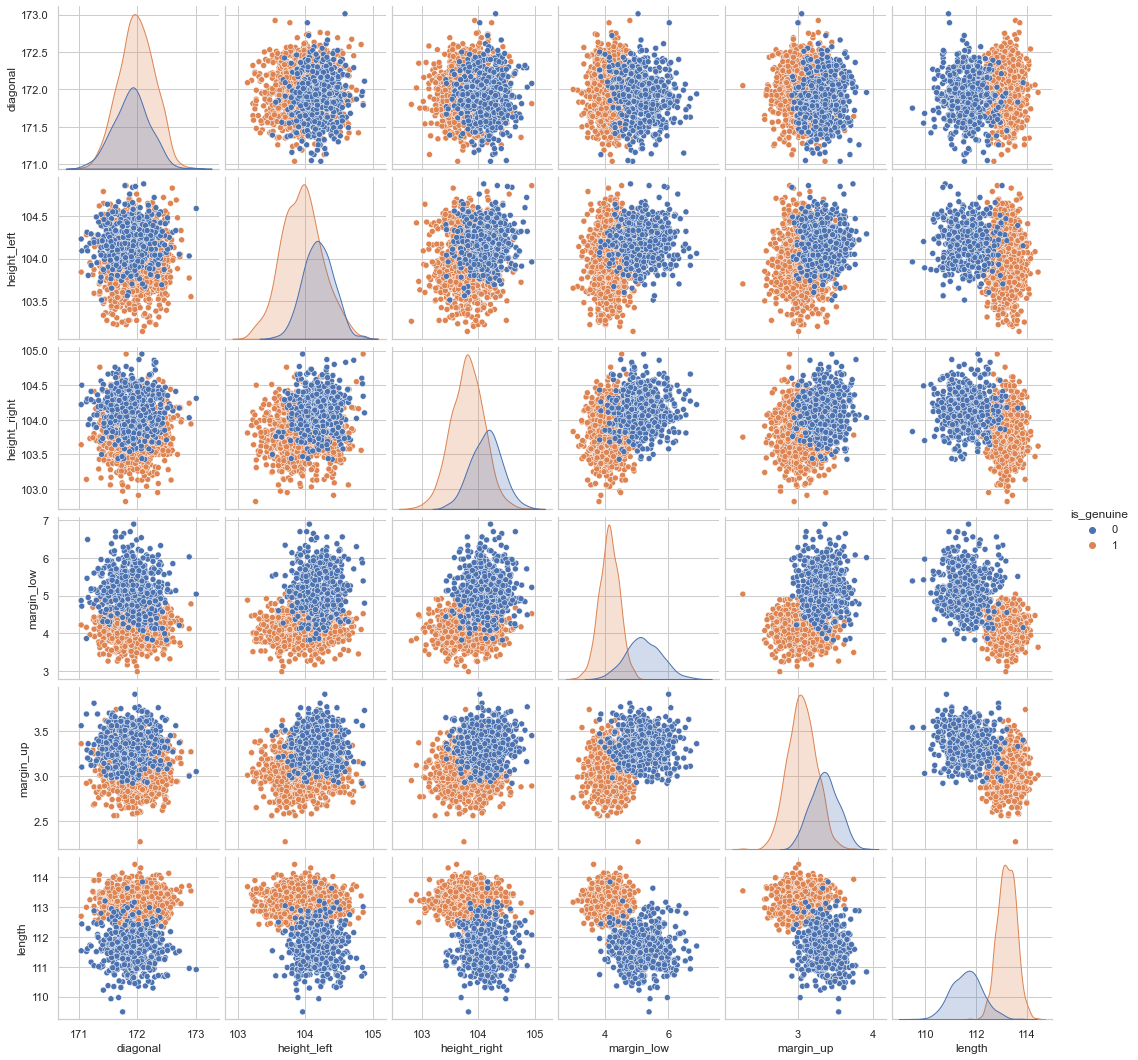

In [57]:
#Affichage de la matrice de diagrammes de dispersion

fig = plt.figure(figsize=(8, 8))

sns.pairplot(df_final, hue='is_genuine')
plt.show();

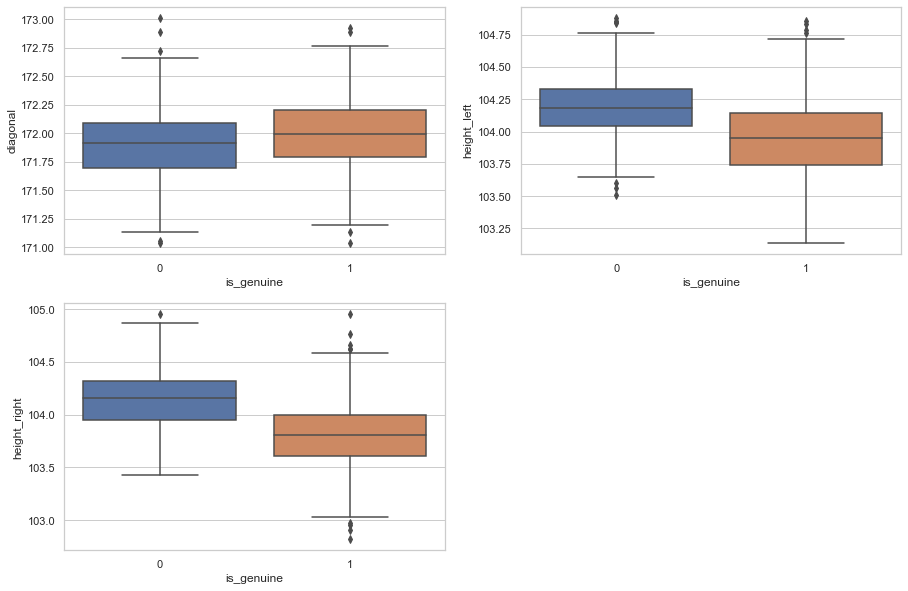

In [58]:
# Affichages des boxplots 
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(x="is_genuine", y="diagonal", data=df_final)
plt.subplot(222)
sns.boxplot(x="is_genuine", y="height_left", data=df_final)
plt.subplot(223)
sns.boxplot(x="is_genuine", y="height_right", data=df_final);


<AxesSubplot:xlabel='is_genuine', ylabel='length'>

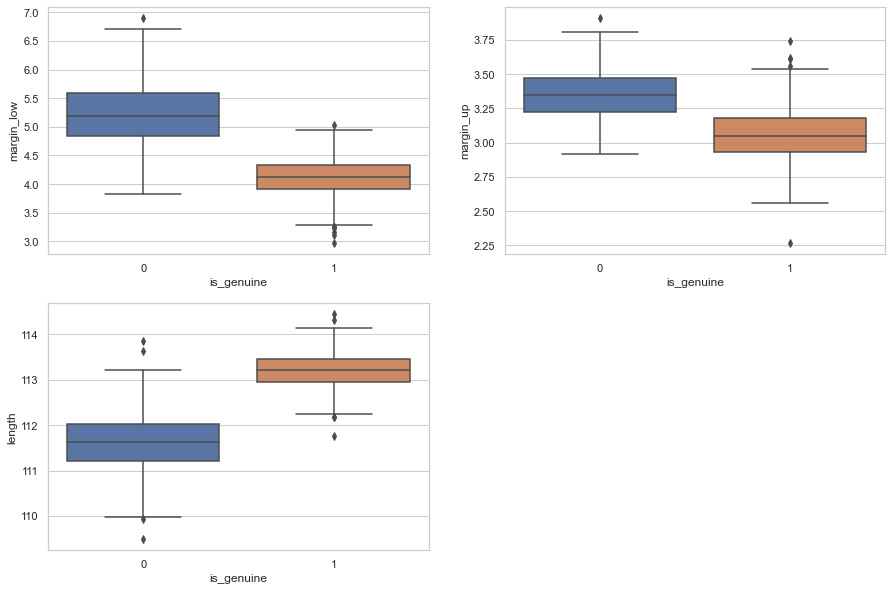

In [59]:
# Affichages des boxplots 
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(x="is_genuine", y="margin_low", data=df_final)
plt.subplot(222)
sns.boxplot(x="is_genuine", y="margin_up", data=df_final)
plt.subplot(223)
sns.boxplot(x="is_genuine", y="length", data=df_final)

On remarque une grande diff√©rence de variance entre les vrais et faux billets pour toutes les variables. La diff√©rence est moins nette pour diagonal

# Analyse de la variance avec ANOVA √† 1 facteur

On cherche √† savoir si les variables ont une influence sur l'authenticit√© des billets de banque. On r√©alise une ANOVA √† 1 facteur

En r√©gression lin√©aire multiple, l'ANOVA permet de tester si l'ensemble des variables explicatives influent de fa√ßon significative sur la variable d√©pendante

## Test de Fischer

Le test de Fischer permet d'analyser la variance

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Liste des variables √† inclure dans l'ANOVA
variables = ['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']

# Boucle pour effectuer l'ANOVA pour chaque variable
for i in variables:
    # Cr√©ation du mod√®le ANOVA
    model = ols('{} ~ is_genuine'.format(i), data=df_final).fit()
    # Effectuer l'ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)
    # Affichage du r√©sultat
    print('ANOVA for {}:'.format(i))
    display(anova_table)

ANOVA for diagonal:


sum_sq      df          F        PR(>F)
is_genuine    2.460749     1.0  26.874763  2.466867e-07
Residual    137.162201  1498.0        NaN           NaN

ANOVA for height_left:


sum_sq      df           F        PR(>F)
is_genuine   19.394088     1.0  252.558393  1.126916e-52
Residual    115.032185  1498.0         NaN           NaN

ANOVA for height_right:


sum_sq      df           F        PR(>F)
is_genuine   37.401634     1.0  460.974212  2.270856e-89
Residual    121.541825  1498.0         NaN           NaN

ANOVA for margin_low:


sum_sq      df            F         PR(>F)
is_genuine  400.020183     1.0  2379.968951  1.031937e-311
Residual    251.780694  1498.0          NaN            NaN

ANOVA for margin_up:


sum_sq      df           F         PR(>F)
is_genuine  29.607294     1.0  870.581394  3.144530e-151
Residual    50.944950  1498.0         NaN            NaN

ANOVA for length:


sum_sq      df            F  PR(>F)
is_genuine  823.507935     1.0  3876.654138     0.0
Residual    318.216390  1498.0          NaN     NaN

- La p-valeur de ce test est tr√®s petite et largement inf√©rieure √† 5 %. 
- On rejette donc l'hypoth√®se H0 selon laquelle Œ±1=Œ±2=Œ±3=Œ±4=Œ±5=Œ±6=0. 
- Les variables sont probablement d√©pendantes de l'authenticit√© des billets.

In [61]:
# Sauvegarde du df_final dans un fichier CSV
df_final.to_csv('df_final.csv', index=False)